### 4. Take a grayscale image of size 512x512, add some Gaussian noise, and perform the following operations in the frequency domain:
        
        (a) Apply 4th order Butterworth and Gaussian low pass filters to analyze their performance quantitatively.

In [38]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Add Gaussian Noise

In [39]:
# Mean (“centre”) of the distribution.
# Standard deviation (spread or “width”) of the distribution.

def add_gaussian_noise(image, mean=0, sigma=50):

    noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = np.clip(image + noise, 0, 255)

    return noisy_image.astype(np.uint8)

### Butterworth Lowpass Filter

In [40]:
def applyButterWorthFilter(image, order, D0):    # D0 is the cutoff frequency

    height, width = image.shape
    butterWorthFilter = np.zeros(image.shape, dtype=np.float32)

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height/2)**2 + (v - width/2)**2)
            butterWorthFilter[u, v] = 1 / (1 + (D / D0)**(2 * order))

    filteredImage = image * butterWorthFilter
    
    return filteredImage

### Gaussian Lowpass Filter

In [41]:
def applyGaussianFilter(image, D0):     # D0 is the cut-off frequency

    height, width = image.shape
    gaussianFilter = np.zeros(image.shape, dtype=np.float32)

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height/2)**2 + (v - width/2)**2)
            gaussianFilter[u, v] = np.exp(-(D**2) / (2 * (D0**2)))

    filteredImage = image * gaussianFilter

    return filteredImage

### DFT

In [42]:
def applyFFT(image):

    fftImage = np.fft.fftshift(np.fft.fft2(image))

    return fftImage

### IDFT

In [43]:
def applyIDFT(image):

    idftImage = np.fft.ifft2(np.fft.ifftshift(image)).real

    return idftImage

In [44]:
originalImage = cv2.imread("img5.tif", cv2.IMREAD_GRAYSCALE)

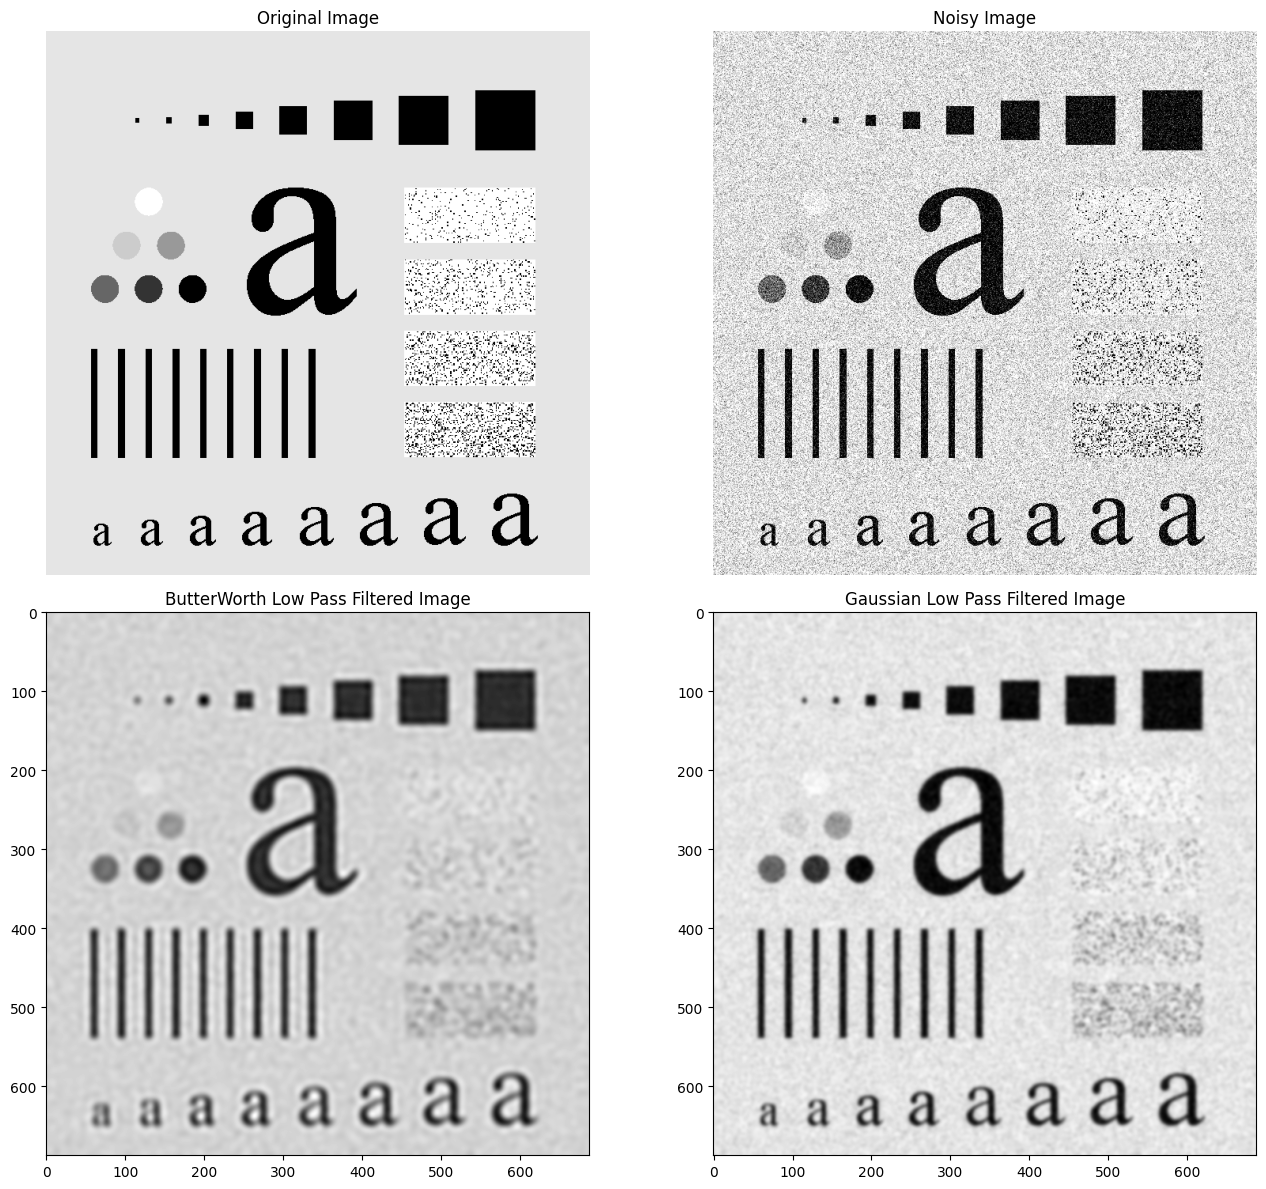

In [45]:
plt.figure(figsize=(16, 12))


# Original Image
plt.subplot(2, 2, 1)
plt.imshow(originalImage, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.tight_layout()


# Adding Gaussian Noise
noisyImage = add_gaussian_noise(originalImage)
plt.subplot(2, 2, 2)
plt.imshow(noisyImage, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')
plt.tight_layout()

# Applying DFT
fftImage = applyFFT(noisyImage)

# Applying ButterWorth Low Pass Filter
butterWorthFiltered = applyButterWorthFilter(fftImage, 4, 50)
finalImageBWF = applyIDFT(butterWorthFiltered)
plt.subplot(2, 2, 3)
plt.imshow(finalImageBWF, cmap='gray')
plt.title("ButterWorth Low Pass Filtered Image")
plt.tight_layout()

# Applying Gaussian Low Pass Filter
gaussianFiltered = applyGaussianFilter(fftImage, 50)
finalImageGF = applyIDFT(gaussianFiltered)
plt.subplot(2, 2, 4)
plt.imshow(finalImageGF, cmap='gray')
plt.title("Gaussian Low Pass Filtered Image")
plt.tight_layout()